# Notes on using the simulation functions. 

Import the functions into the notebook as follows: 

In [1]:
from simulation_funcs.helper_funcs import *
from simulation_funcs.model_SGLD import *
from simulation_funcs.model_SGADA import *

If working in another dir, consider using the following. Note to change pwd

In [2]:
import sys
sys.path.append('<PWD>'+'/quantum-generative-modelling/')

Then we can load sample data. 

In [3]:
### test for betas 
import pickle
with open(f'./numerical_sim/bi_gaussain/gen_data.pkl', 'rb') as file:
    data = pickle.load(file)

To run a numerical simulation either call 
run_model_SGADA or
run_model_SGLD. 
The input variables are: 

    1. Data. (np.array) 
    2. Noise, (bool) yes/no
    3. beta, (float)
    4. Number of steps, (float)
    5. Number of Qubits (float) 
    6. Circuit depth, (float) 
    7. Print flag (bool)



In [4]:
n_qubits, circuit_depth = 8, 3
gates, qubit_inds, param_inds, n_params = get_circuit(n_qubits, circuit_depth)
hyperparams = {'h': 0.1, 'M': jnp.eye(n_params), 'mu_inv': 1., 'N_d': 1., 'beta': 1., 'sigma': 1., 'sigma_a': 1., 
                   'n_steps': 5000, 'n_qubits': n_qubits, 'circuit_depth': circuit_depth, 'batch_size': 200}

In [5]:
output, cost_vals, run_time, params, param_to_st = run_model_SGADA(data, hyperparameters=hyperparams)

Progress: |██████████████████████████████| 100.00% | Iteration: 5000/5000 | Cost: 0.227017 | Elapsed Time: 3792.52s | Estimated Remaining Time: 0.00sss


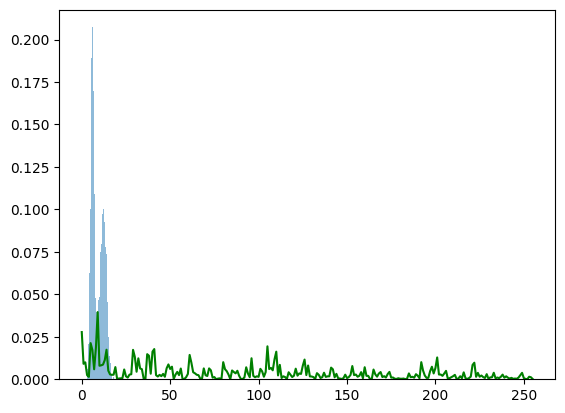

In [8]:
plt.hist(data, bins=50, density=True, alpha=0.5)
av_probs = jnp.square(jnp.abs(param_to_st(np.array(params[100:]).mean(0)).flatten())) #compute_av_probs(params, param_to_st, 100)
plt.plot(av_probs, label="Averaged over parameters", color='green')


Progress: |█████████████████████████████-| 99.00% | Iteration: 99/100 | Cost: 1.018409 | Elapsed Time: 33.69s | Estimated Remaining Time: 0.34ss


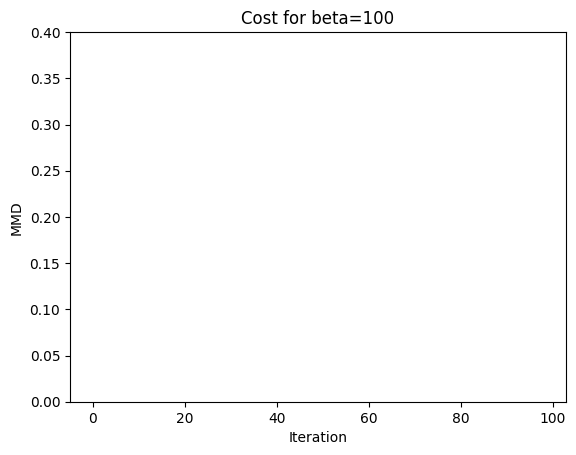

In [8]:
hyperparams = {'beta': 100,'n_steps': 500, 'n_qubits':8 , 'circuit_depth':3, 'batch_size': 200}
output, cost_vals, run_time, params = run_model_SGLD(data, hyperparameters=hyperparams)